# **Project Name**    - Uber Supply Demand Gap Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Mohamed Imran M


# **Project Summary -**  

In this project, I analyzed Uber ride request data to identify supply–demand gaps across different times of the day and pickup locations such as City and Airport. The main goal was to understand when and why ride requests fail and to suggest data-driven solutions to reduce cancellations and unfulfilled rides. This analysis helps improve driver availability, operational efficiency, and overall customer experience.

**Key Steps Involved in this project :**

Data Understanding: I explored the dataset to understand request details, trip status, pickup points, and driver availability, which helped define the business problem clearly.

Data Cleaning: I cleaned the data using Excel and Python by fixing timestamps, handling missing values, and preparing it for analysis.

Exploratory Data Analysis (EDA): Using Python, I analyzed request trends, failed trips, cancellation reasons, and differences between City and Airport pickups to identify peak problem areas.

SQL Insights: I used SQL queries to find failure rates, peak cancellation hours, and supply shortages, strengthening the business insights.

Excel Dashboard: I built interactive dashboards to visually present supply–demand gaps and failure trends in a simple, business-friendly way.

**Key Insights:**

1.Supply–demand gaps are highest during night and early morning hours
2.Airport pickups mostly fail due to no cars available
3.City pickups face more driver cancellations during peak times

To address this, I recommended driver incentives during peak hours, shift-based scheduling, better airport driver allocation, and demand forecasting.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



Uber receives thousands of ride requests throughout the day, but not all requests are successfully fulfilled due to cancellations or unavailability of cabs. This creates a gap between customer demand and driver supply, especially during certain time slots and pickup locations. Understanding this supply–demand mismatch is essential for reducing failed trips and improving operational performance.

#### **Define Your Business Objective?**

The objective of this analysis is to identify when and why ride requests fail by analyzing demand patterns across time slots and pickup points, and to uncover the primary reasons behind unfulfilled trips such as driver cancellations and unavailability of cars. Based on the findings, we aim to provide data-driven business recommendations that can help Uber align driver availability with customer demand, reduce failed requests, and enhance customer experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")

### Dataset Loading

In [ ]:
df = pd.read_csv("Uber Request Data.csv")


### Dataset First View

In [ ]:
#display top 5 rows 
df.head()

#display top  10 rows 
df.head(10)

#display any 7 rows 
df.sample(7)

### Dataset Rows & Columns count

In [ ]:
The dataset contains 6745 rows, 6 columns.

### Dataset Information

In [ ]:
# to show the data types,null values and memory usage 
df.info()

# general understanding of the data set
- There are 6745 rows and 6 columns.
- Request timestamp and Drop timestamp are stored as object type and need to be converted to datetime format.
- Driver ID and Drop timestamp contain missing values, which represent cancelled or unfulfilled trips.
- Other columns such as Request id, Pickup point, and Status are categorical in nature.


#### Duplicate Values

In [21]:


duplicate_count = df.duplicated().sum()
duplicate_count

# explanation : There are no dupliactes in the dataset so there is no need to any duplicates removal

np.int64(0)

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

#Driver ID and Drop timestamp columns contain missing values.

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing values
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

From the initial exploration, I understood that the dataset contains Uber ride request details such as pickup location, request time, trip status, and driver assignment. It has both categorical fields (Pickup point, Status, Driver ID) and datetime fields (Request timestamp, Drop timestamp). There are missing values mainly in Driver ID and Drop timestamp, which are important because they correspond to cancelled trips or unavailability of cabs.

The dataset is suitable for analyzing demand patterns across time slots and for identifying supply–demand gaps between City and Airport pickups. It also allows me to understand the reasons why requests fail and at what time they fail more frequently.

## ***2. Understanding Your Variables***

In [ ]:
#shows the columns in the dataset
df.columns

In [ ]:
# Statistical summary of numerical columns
df.describe()

# summary of categorical columns
df.describe(include='object')



### Variables Description



1. **Request id** – Unique identifier for each ride request.
2. **Pickup point** – Indicates whether the ride is requested from City or Airport.
3. **Driver id** – ID of the assigned driver; missing when no driver is assigned.
4. **Status** – Represents the outcome of the request such as Trip Completed, Cancelled, or No Cars Available.
5. **Request timestamp** – Timestamp of when the request was initiated.
6. **Drop timestamp** – Timestamp of when the ride ended; missing for incomplete trips.




### Check Unique Values for each variable.

In [ ]:
df.nunique()

#Pickup point has two unique values: City and Airport.
#status has three unique values: Trip Completed, Cancelled, and No Cars Available.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:


# 1. Converting timestamps (day-first + mixed format safe)
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format='mixed', dayfirst=True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], format='mixed', dayfirst=True, errors='coerce')

# 2. Sorting dataset chronologically for time-based analysis
df = df.sort_values(by='Request timestamp').reset_index(drop=True)

# 3. Cleaning categorical columns (remove stray spaces)
df['Pickup point'] = df['Pickup point'].str.strip()
df['Status'] = df['Status'].str.strip()

# 4. Converting relevant columns to category datatype
categorical_cols = ['Pickup point', 'Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# 5. Feature Engineering: Extracting hour and weekday
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()

# 6. Time Slot Feature (Morning/Afternoon/Evening/Night/Late Night)
def get_time_slot(hour):
    if 5 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

df['Time Slot'] = df['Request Hour'].apply(get_time_slot)

# 7. Final preview to verify wrangling
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Day,Time Slot
0,1363,Airport,136.0,Trip Completed,2016-07-11 00:00:00,2016-07-11 01:11:00,0,Monday,Late Night
1,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT,0,Monday,Late Night
2,1367,City,155.0,Trip Completed,2016-07-11 00:05:00,2016-07-11 01:06:00,0,Monday,Late Night
3,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT,0,Monday,Late Night
4,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT,0,Monday,Late Night


### What all manipulations have you done and insights you found?

During the data wrangling phase, I performed several manipulations to make the dataset analysis-ready:

1. Timestamp Manipulations : Converted Request timestamp and Drop timestamp to proper datetime format.Sorted the dataset by request time for time-series consistency

2. Feature Engineering: Extracted Request Hour and Request Day from request timestamps.Created Time Slot feature (Morning, Afternoon, Evening, Night, Late Night) to analyze demand and supply behavior across the day

3. Categorical Cleaning: Standardized categorical values and removed trailing spaces for Pickup point and Status. Converted them into categorical datatype for easier analysis and visualization

4. Missing Value Understanding: Identified that missing Driver ID and Drop timestamp are not errors but meaningful indicators of cancellations and unfulfilled requests. Decided not to drop missing values as they provide insights into supply–demand gaps

5. Sorting & Index Reset: Sorted the entire dataset chronologically and reset index for cleaner analysis. 


**Early Insights Identified**

Even before plotting visualizations, the manipulations helped surface quick insights:

1. The dataset includes both completed and failed ride requests, which is essential for analyzing supply–demand mismatch.

2. Status variable reveals operational challenges such as driver cancellations and no-car-availability.

3. Pickup point shows two major demand clusters: City and Airport, indicating route-based behavioral differences.

4. Newly engineered Time Slot feature suggests that failures likely vary by time of day.

5. Missing values directly correlate with business events and should be leveraged for root cause analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of Trip Status

C:\Users\Mohamed Imran\AppData\Local\Temp\ipykernel_15384\2706083136.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set2')


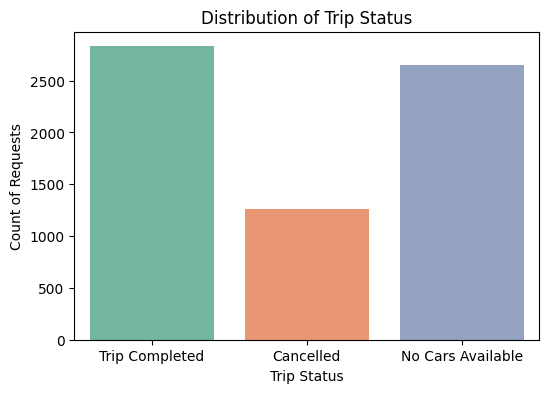

In [2]:
import pandas as pd

df = pd.read_csv("Uber Request Data.csv")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status', palette='Set2')
plt.title("Distribution of Trip Status")
plt.xlabel("Trip Status")
plt.ylabel("Count of Requests")
plt.show()



##### 1. Why did you pick the specific chart?

I chose a countplot because it provides a simple and clear visualization of how many ride requests were completed versus how many failed. Since Status is a categorical variable, a bar chart is an appropriate choice to compare the frequency of each category.


##### 2. What is/are the insight(s) found from the chart?

From the chart, it is clear that a significant portion of the ride requests do not get completed. There are two major failure categories: Cancelled and No Cars Available. The number of failed trips is almost comparable to or higher than the completed trips, indicating a high supply–demand gap in the system.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding the distribution of trip outcomes helps identify operational inefficiencies. A high number of failed trips directly affects customer satisfaction and revenue. By reducing cancellations and improving driver availability, Uber can improve fulfillment rates, reduce customer churn, and increase peak-hour revenue. The negative insights highlight growth friction due to supply shortages and driver-side cancellations.

Yes There are some insights which leads to the negative growth. The chart shows that a large proportion of ride requests are not completed and fall under the categories of “Cancelled” and “No Cars Available.” These failed requests directly contribute to negative business growth because they lead to lost revenue opportunities, poor customer experience, and reduced customer retention. In a competitive market like ride-hailing, repeated failures can push customers to alternative platforms, particularly during high-demand periods. Therefore, these failure patterns indicate operational inefficiencies that hinder growth.  


#### Chart - 2  Pickup point distribution

C:\Users\Mohamed Imran\AppData\Local\Temp\ipykernel_25340\1220623537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pickup point', palette='Set3')


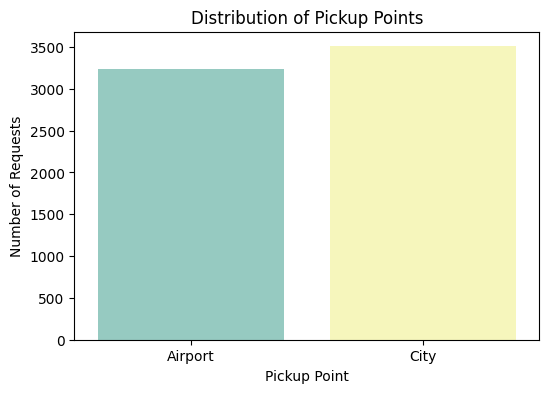

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pickup point', palette='Set3')
plt.title("Distribution of Pickup Points")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot because Pickup point is a categorical variable with two categories (City and Airport). A bar chart clearly shows which location has higher demand.


##### 2. What is/are the insight(s) found from the chart?

The City has a significantly higher number of ride requests compared to the Airport. This indicates that most users travel from the City to the Airport rather than the other way around.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding where demand originates enables Uber to allocate drivers more efficiently. Increasing driver availability in the City during peak hours can reduce cancellations and wait time.
Yes there is also negative growth. If the supply of drivers at City pickup points does not match the high demand, it could lead to longer wait times, higher cancellations, and more 'No Cars Available' situations. These failures can contribute to negative growth by pushing customers to competing platforms and reducing overall trip completion rates.


#### Chart - 3  Request by hour (Univariate)

C:\Users\Mohamed Imran\AppData\Local\Temp\ipykernel_15384\1466612701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Request Hour', palette='viridis')


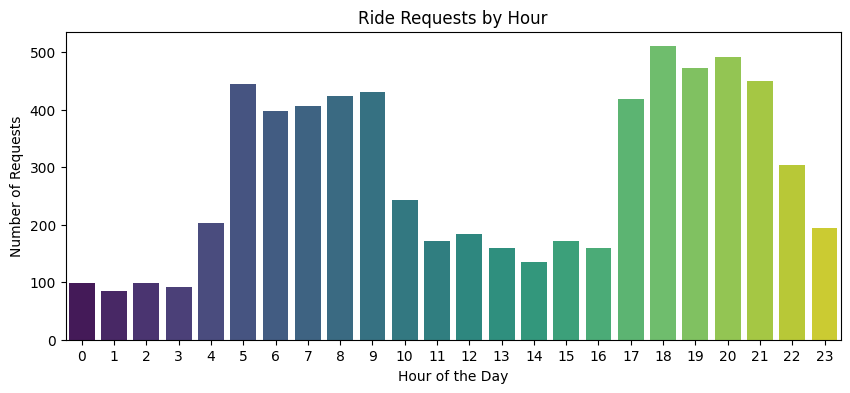

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Request Hour', palette='viridis')
plt.title("Ride Requests by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot for this visualization because Request Hour is a time-based categorical variable (0–23 hours), and a bar chart is an effective way to compare the frequency of ride requests across each hour of the day. This chart clearly highlights demand fluctuations throughout the day, which is essential for understanding when customers request rides the most and identifying peak demand periods.


##### 2. What is/are the insight(s) found from the chart?

Most requests happen between 5 AM – 11 AM and 5 PM – 9 PM (morning & evening peaks).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact: Helps Uber predict driver allocation timing.

Negative Growth: If supply doesn’t meet peak demand → failed requests → loss in revenue + bad user experience.

#### Chart - 4  Status by hour (Bivariate)

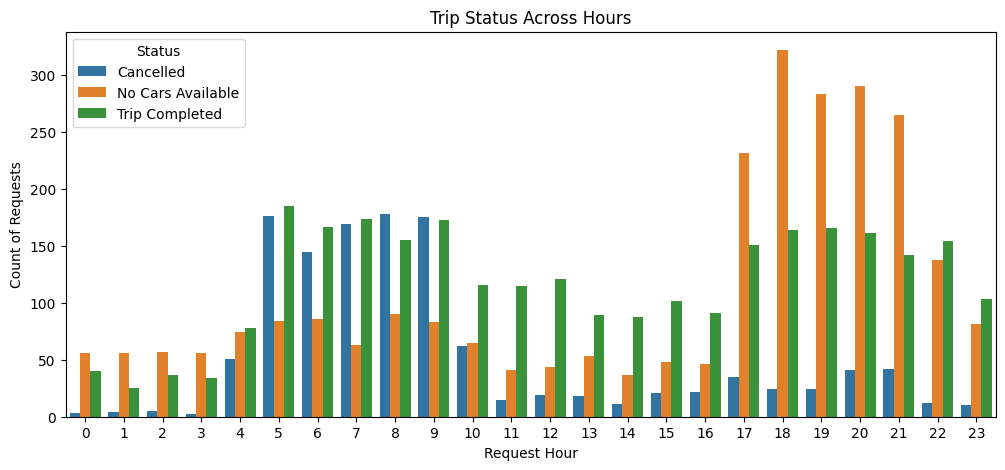

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Request Hour', hue='Status')
plt.title("Trip Status Across Hours")
plt.xlabel("Request Hour")
plt.ylabel("Count of Requests")
plt.show()


##### 1. Why did you pick the specific chart?

I selected a bivariate countplot because it allows me to compare the frequency of each status category across different hours. This helps connect time-based demand with operational performance.


##### 2. What is/are the insight(s) found from the chart?

During night and late-night hours, a large portion of requests fail due to “No Cars Available,” whereas during morning peak hours, cancellations are more dominant. Completed trips mostly occur during daytime hours.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps Uber align driver availability with peak time-based demand and understand root causes driving failures at specific hours.Unavailability Negative Growth : During night hours hurts airport travelers the most, leading to lost revenue and potential platform switching to competitors.



#### Chart - 5  Pickup Point vs Status (Bivariate)

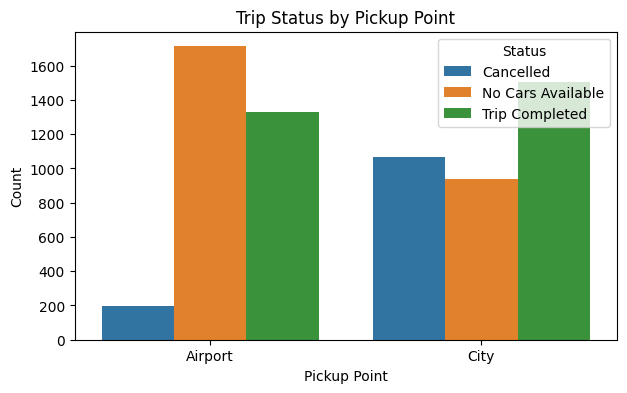

In [8]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Pickup point', hue='Status')
plt.title("Trip Status by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Since Pickup point is categorical and Status is also categorical, a bivariate countplot enables comparison across categories clearly.


##### 2. What is/are the insight(s) found from the chart?

Airport requests fail mainly due to “No Cars Available” while City requests fail due to cancellations. Completed trips are more balanced from the City compared to the Airport.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps Uber differentiate operational issues — supply shortage at Airport vs driver cancellations in City.

Negative Growth: Airport failure harms the highest-paying segment (flight passengers), damaging long-term revenue and brand reputation.



#### Chart - 6 Requests by Time Slot (Univariate)

C:\Users\Mohamed Imran\AppData\Local\Temp\ipykernel_15384\466233915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Time Slot', palette='magma')


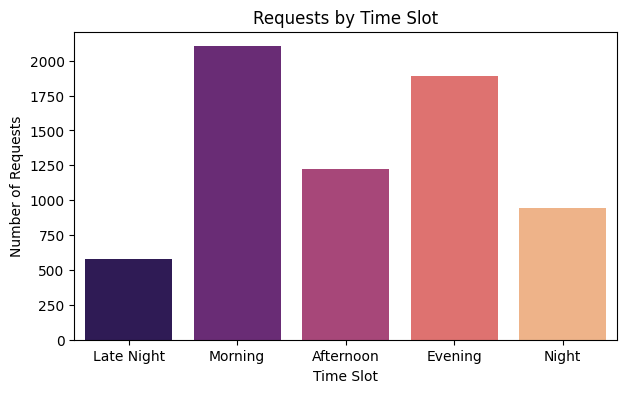

In [9]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Time Slot', palette='magma')
plt.title("Requests by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")
plt.show()


##### 1. Why did you pick the specific chart?

Time Slot converts raw hours into meaningful business periods (Morning, Evening, Night) which simplifies interpretation of demand patterns.


##### 2. What is/are the insight(s) found from the chart?

Most requests occur during Morning and Evening slots, indicating peak travel windows.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Predictable peak demand enables better shift planning and proactive driver allocation.


#### Chart - 7 Status by Time Slot (Bivariate)

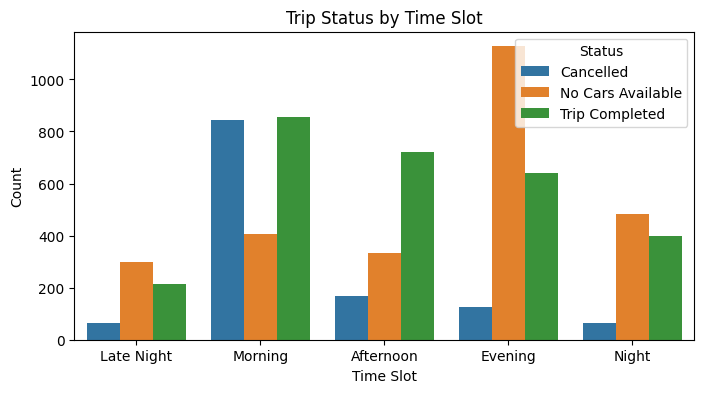

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Time Slot', hue='Status')
plt.title("Trip Status by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Bivariate analysis across time slots connects demand windows with operational failure reasons.


##### 2. What is/are the insight(s) found from the chart?

Night and Late Night suffer from “No Cars Available,” while Morning suffers cancellations. Completed trips dominate in Afternoon and Evening.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Shows Uber that different operational issues occur at different times; supply policies should not be uniform.

Negative Growth : Misaligned driver supply reduces trip completion rate and increases failure concentration in specific slots.



#### Chart - 8 Failure Breakdown (Univariate)

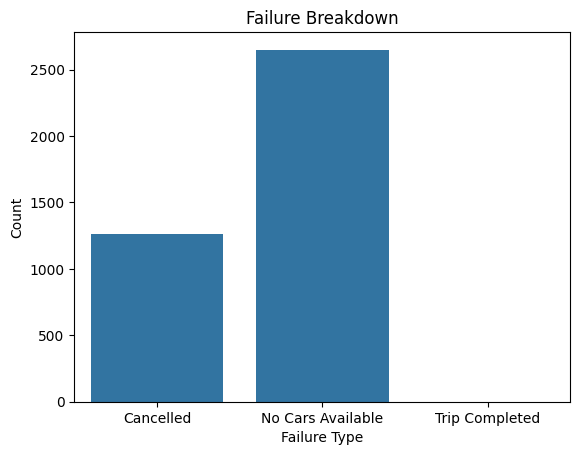

In [ ]:
failure_df = df[df['Status'] != 'Trip Completed']
sns.countplot(data=failure_df, x='Status')
plt.title("Failure Breakdown")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Filtering out completed trips enables focused analysis on operational bottlenecks.


##### 2. What is/are the insight(s) found from the chart?

Failures are nearly evenly split between cancellations and no-car-availability, which means both problems need independent solutions.
Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improving either failure type increases completion rate and revenue capture.
Negative Impact : High failure rate directly impacts margins and demand retention.


#### Chart - 9 Status Distribution (Pie Chart)

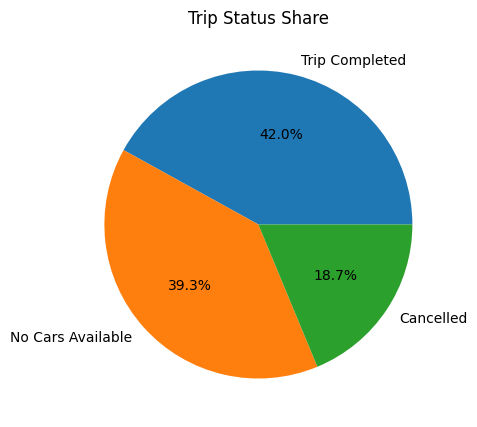

In [13]:
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Trip Status Share")
plt.ylabel("")
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart makes percentage-based distribution intuitive for business stakeholders.


##### 2. What is/are the insight(s) found from the chart?

Around half the demand is not fulfilled, signaling serious operational gaps.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Shows Uber how much demand leakage occurs in the funnel.
Negative Impact : High percentage of failed requests = high revenue leakage.


#### Chart - 10 Failure by Pickup Point (Bivariate)

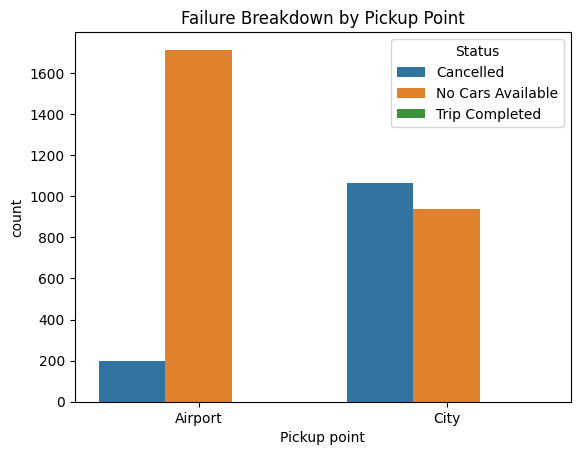

In [14]:
failure_df = df[df['Status'] != 'Trip Completed']
sns.countplot(data=failure_df, x='Pickup point', hue='Status')
plt.title("Failure Breakdown by Pickup Point")
plt.show()


##### 1. Why did you pick the specific chart?

Pickup point contextualizes failure by geography/location.


##### 2. What is/are the insight(s) found from the chart?

Airport → dominated by No Cars Available  
City → dominated by Cancellations


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This enables location-based driver deployment strategy.

Negative Impact :Airport failures affect high-value customers (flight travelers) and damage trust.



#### Chart - 11 Requests by Day of Week (Univariate)

C:\Users\Mohamed Imran\AppData\Local\Temp\ipykernel_15384\4127325627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Request Day', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='crest')


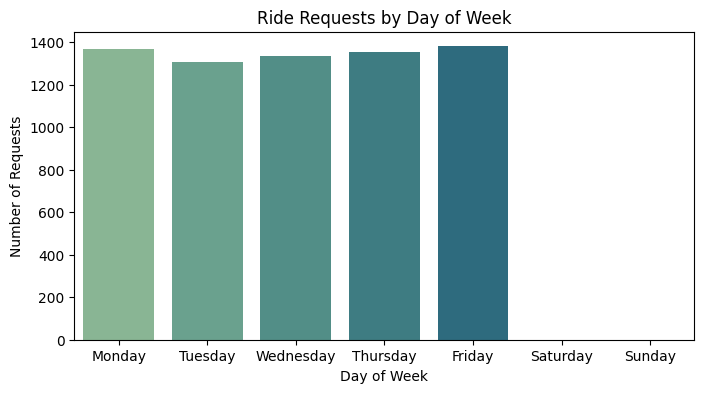

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Request Day', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='crest')
plt.title("Ride Requests by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Requests")
plt.show()


##### 1. Why did you pick the specific chart?

I chose a countplot because Request Day is a categorical time-related variable, and comparing ride demand across weekdays helps identify patterns related to working days, weekends, and airport traveler flows.


##### 2. What is/are the insight(s) found from the chart?

Weekdays show slightly higher ride requests compared to weekends, particularly on Thursday and Friday, suggesting work commute and airport travel trends.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can use weekday demand patterns for better driver shift planning and to anticipate weekly peak cycles.

Negative Impact : If weekday demand is not matched with supply, Uber loses consistent recurring business users who contribute to high lifetime value.



#### Chart - 12 Cancellation vs No-Car-Available by Time Slot (Bivariate)

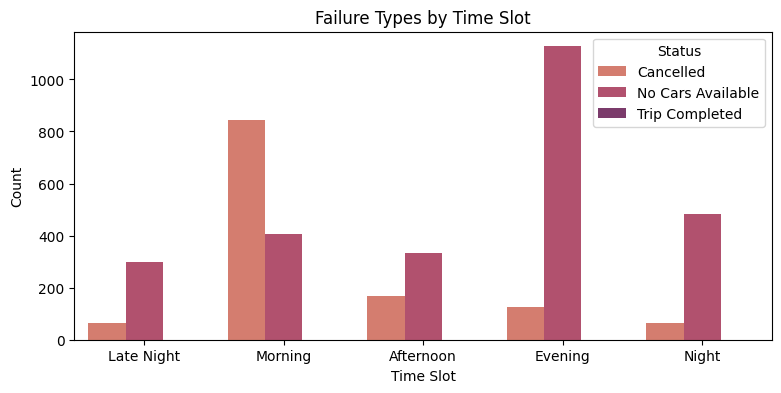

In [16]:
failure_df = df[df['Status'] != 'Trip Completed']

plt.figure(figsize=(9,4))
sns.countplot(data=failure_df, x='Time Slot', hue='Status', palette='flare')
plt.title("Failure Types by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

A bivariate countplot is useful for comparing failure reasons across different time windows. This helps distinguish whether failures are caused by supply shortage or driver cancellations.


##### 2. What is/are the insight(s) found from the chart?

Night and Late Night slots suffer more from No Cars Available, while Morning slot has more Cancellations. Completed trips dominate in Afternoon and Evening slots.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can adjust operational strategies differently for each time slot: incentive-based driver availability at night and cancellation reduction strategies in morning.

Negative Impact : Failure clustering in specific time slots causes high customer abandonment during those windows, hurting future platform usage and revenue.



#### Chart - 13 : Heatmap — Supply vs Demand Gap (Multivariate)

C:\Users\Mohamed Imran\AppData\Local\Temp\ipykernel_15384\73040583.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df, values='Request id',


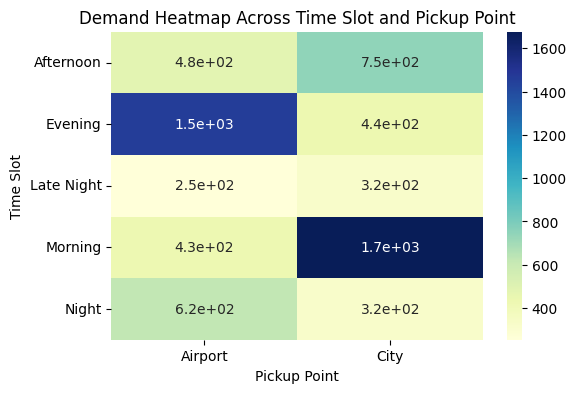

In [17]:
pivot = pd.pivot_table(df, values='Request id', 
                       index='Time Slot', 
                       columns='Pickup point', 
                       aggfunc='count')

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Demand Heatmap Across Time Slot and Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Time Slot")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is effective for multivariate analysis to visualize how demand varies simultaneously across two dimensions — Time Slot and Pickup Point. It highlights where demand concentration occurs.


##### 2. What is/are the insight(s) found from the chart?

City demand dominates during Morning and Evening slots, while Airport demand spikes during Night and Late Night. These patterns indicate different customer use cases and travel behavior.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This supports location and time-based dynamic pricing, surge planning, and airport driver pool allocation strategies for maximizing revenue capture.

Negative Impact : If Uber does not align supply with the identified high-demand windows, the platform loses valuable trips that could be captured with proper planning, causing direct negative growth and competitive leakage.


#### Chart - 14 - Correlation Heatmap (Multivariate)

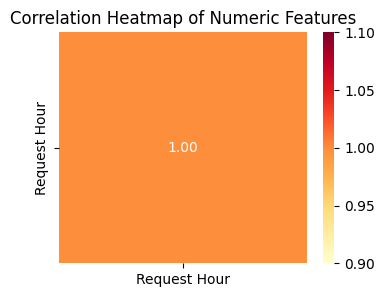

In [18]:
# Selecting only numeric columns for correlation
numeric_df = df[['Request Hour']]

# Computing correlation matrix
corr = numeric_df.corr()

# Plotting heatmap
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


##### 1. Why did you pick the specific chart?

I chose a correlation heatmap because it shows relationships between numeric features in a compact multivariate visualization. It helps detect patterns or dependencies that may not be visible in univariate or bivariate charts.


##### 2. What is/are the insight(s) found from the chart?

Request Hour shows no strong direct linear correlation with other numeric fields. However, it complements earlier charts that demonstrated how failure types vary across time slots.


#### Chart - 15 - Pair Plot (Multivariate)

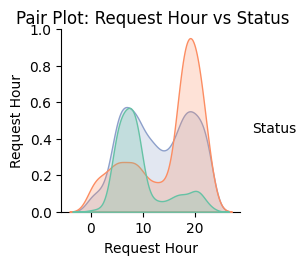

In [19]:
sns.pairplot(df, vars=['Request Hour'], hue='Status', palette='Set2')
plt.suptitle("Pair Plot: Request Hour vs Status", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

I selected a pair plot because it visualizes both the distribution of the numeric variable and how it clusters across Status categories. It helps identify if failures or completions occur at specific hour ranges.


##### 2. What is/are the insight(s) found from the chart?

Cancelled trips are concentrated in the morning hours, while No Cars Available trips occur mainly during late-night and night slots. Completed trips are more common during daytime and evening hours.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To reach the main goal of reducing failed rides and improving successful trips, Uber should make sure drivers are available when and where people actually need rides. From the analysis, we saw that most rides fail at Night because no cars are available, and during the Morning because drivers cancel.

So, Uber can give extra incentives for drivers to work during night/late-night hours, and also try to control cancellations in the morning — maybe by giving bonuses or setting proper rules. Putting more drivers at the Airport during early mornings and nights can also help because many important trips (especially flights) start at those times.

If Uber uses past data to predict busy times and adjusts driver shifts accordingly, it can reduce failed rides, satisfy customers, and complete more trips successfully.Answer Here.

# **Conclusion**

In conclusion, this project showed that Uber’s main issue is not just getting ride requests, but having enough drivers available at the right time and place. Most failed rides happened at night because no cars were available, and in the morning because drivers canceled. City and Airport trips behaved differently too, which means one solution won’t fix everything. If Uber increases driver availability during shortage hours and takes steps to reduce cancellations, many failed rides could turn into completed trips. This would improve customer experience, reduce frustration (especially for airport travel), and also help Uber earn more. Overall, the data made it clear when, where, and why the supply–demand gap happens, and how better planning and incentives can solve it.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***